# Проектная работа 7. Проверка гипотез для увеличения выручки интернет-магазина

## Оглавление

1. [Описание проекта.](#step0)  
2. [1. Загрузка и обзор данных.](#step1)  
3. [2. Предобработка данных.](#step2)
4. [3. Приоритизация гипотез.](#step3)
5. [4. Анализ A/B-теста.](#step4)
6. [5. Итоговые выводы.](#step5)


## Описание проекта. <a id="step0"></a>   
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.

Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализируйте результаты. 

В нашем распоряжении :
    
 - файл hypothesis.csv - 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
    
 - Результаты A/B-теста описаны в файлах orders.csv и visitors.csv.
 
 
*Иследование пройдёт в несколько этапов:*
        
 1. Обзор данных.

 2. Предобработка данных.

 3. Приоритизация гипотез. 
 
 4.  Анализ A/B-теста, принятие решения по результатам теста и объясните его.

Файл /datasets/hypothesis.csv. Скачать датасет

    Hypothesis — краткое описание гипотезы;
    Reach — охват пользователей по 10-балльной шкале;
    Impact — влияние на пользователей по 10-балльной шкале;
    Confidence — уверенность в гипотезе по 10-балльной шкале;
    Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

## 1. Загрузка и обзор данных. <a id="step1"></a>   

Импортируем необходимые библиотеки, загрузим данные в переменные.

In [1]:
#импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from scipy import stats as st
import numpy as np
#вывод значений без сокращений
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', -1)

In [2]:
#открываем и сохраняем как датафрейм файл с данными:
hypothesis, orders, visitors = (
                            pd.read_csv('7_project_data\\hypothesis.csv'),
                            pd.read_csv('7_project_data\\orders.csv'),
                            pd.read_csv('7_project_data\\visitors.csv')
                            )

Зададим функцию для удобства описания датафреймов:

In [3]:
#столбцы и строки полностью, формат округлен
pd.set_option('display.max_columns', None)

#функция для вывода состава столбцов
def describe_cols(df_data):
    df = df_data
    values = pd.DataFrame()
    
    for col in df.columns:
        values[col] = [df[col].unique(), df[col].dtypes, df[col].nunique()]
        
    return values.transpose().sort_values(by=1, ascending=True).rename(
        {0: 'Значения', 1: 'тип данных', 2: 'Кол-во уникальных значений'}, axis=1)


#функция для вывода пустых значений и их доли в столбцах датафрейма
def nan_values(df_data):
    df = df_data
    count_missing = df.isna().sum()
    percent_missing = round(df.isna().sum() * 100 / len(df), 2)
    
    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                     'num_missing': count_missing,
                                     'percent_missing': percent_missing})
    
    return missing_value_df


#функция для вывода информации о файле
def file_info (df_data):
    print(' Количество строк файла:', df_data.shape[0]) 
      
    print( "\n",'Информация о содержимом файла:')
    display(describe_cols(df_data))
   
    print( "\n",'Информация о пропусках данных:')
    display(nan_values(df_data))
  
    print( "\n", 'Первые пять строк таблицы:')
    display(df_data.head())


### Изучим таблицу hypothesis

In [4]:
file_info(hypothesis)

 Количество строк файла: 9

 Информация о содержимом файла:


,Значения,тип данных,Кол-во уникальных значений
Reach,"[3, 2, 8, 5, 10, 1]",int64,6
Impact,"[10, 5, 3, 1, 2, 7, 9]",int64,7
Confidence,"[8, 4, 7, 3, 1, 2, 9]",int64,7
Efforts,"[6, 10, 3, 8, 1, 5]",int64,6
Hypothesis,"[Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей, Запустить собственную службу доставки, что сократит срок доставки заказов, Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа, Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар, Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей, Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов, Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию, Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок, Запустить акцию, дающую скидку на товар в день рождения]",object,9



 Информация о пропусках данных:


,column_name,num_missing,percent_missing
Hypothesis,Hypothesis,0,0.0
Reach,Reach,0,0.0
Impact,Impact,0,0.0
Confidence,Confidence,0,0.0
Efforts,Efforts,0,0.0



 Первые пять строк таблицы:


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


**Вывод:**

В файле - 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Таблица содержит 9 строк, пропуски отсутствуют.

**Содержание данных:**

- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**Необходимые изменения:**
- привести наименования столбцов к единому стилю (нижний регистр)



### Изучим таблицу orders

In [5]:
file_info(orders)
print('\n','Минимальная дата в колонке date:', orders['date'].min())
print('\n','Максимальная дата в колонке date:', orders['date'].max())

 Количество строк файла: 1197

 Информация о содержимом файла:


,Значения,тип данных,Кол-во уникальных значений
transactionId,"[3667963787, 2804400009, 2961555356, 3797467345, 2282983706, 182168103, 398296753, 2626614568, 1576988021, 1506739906, 3649131742, 1919444843, 2809384911, 3044797713, 3859315276, 2550768810, 1820531107, 1108180333, 1822256754, 674584210, 2904772834, 1240630928, 235474681, 4252514150, 1162046357, 324018163, 2223239646, 1630050528, 2632372083, 2220299125, 1678838030, 2552245563, 3666913472, 486237576, 2153010762, 2258664213, 2165344951, 3601774485, 3276214732, 1950404403, 733587530, 2594268419, 459882198, 2960804513, 376170286, 837819976, 3298573369, 352861950, 133616433, 937773181, 2236784294, 794298435, 854249928, 1545571412, 4159234359, 1144701458, 900025958, 1218444584, 2145193898, 2787983461, 1421016313, 1251767592, 1286673508, 4049927765, 231209528, 2321477056, 4919758, 459227648, 1211699332, 890243194, 3574407166, 3679129301, 477940151, 1295850747, 3721196264, 3710046263, 1110904493, 2619374735, 773663763, 3020845020, 2513016443, 2206140518, 1246801103, 2208648828, 1440965500, 1701653566, 4130553949, 2304731149, 3888787202, 3525980424, 2010908098, 3176574859, 1238204141, 737104568, 252633006, 372616894, 1170105516, 2012801741, 1962247337, 2951489300, ...]",int64,1197
visitorId,"[3312258926, 3642806036, 4069496402, 1196621759, 2322279887, 935554773, 2900797465, 78758296, 295230930, 1882260405, 879864040, 927791387, 3213223594, 728063420, 1565034404, 2742574263, 2973109265, 222718357, 4227830084, 3207734412, 963407295, 1379151787, 1638583360, 351125977, 3234906277, 87885904, 199603092, 237748145, 3591136796, 3803269165, 4027395615, 3024988998, 2038680547, 2378935119, 834683205, 258610743, 2805132315, 2231389472, 1110007955, 114507418, 2552584164, 1494664757, 544632063, 1294108251, 1471496742, 2735494018, 930356060, 1215602524, 3251102545, 1690383497, 2914239125, 2570444314, 2978730290, 3660046170, 1143609305, 5114589, 2951649436, 1221478247, 2115666868, 4256040402, 2712142231, 567175747, 343208965, 2517115269, 2868887864, 1217561296, 2578486380, 3427397479, 3055165772, 2328378067, 8300375, 1422773200, 2947100995, 249864742, 3290315626, 2587526707, 787824685, 3288820196, 4099262874, 1110543778, 3499733621, 2096506107, 3283584911, 3289144202, 276558944, 3736064128, 2295217812, 1253370069, 3379260072, 1035424004, 3595021912, 943674707, 457167155, 2706377257, 414545763, 926057494, 1738775963, 1830791924, 381340408, 2019355024, ...]",int64,1031
revenue,"[1650, 730, 400, 9759, 2308, 2210, 1860, 1044, 13710, 1855, 4008, 4499, 7370, 11985, 10980, 15277, 1060, 990, 16490, 1190, 300, 1050, 632, 15185, 7555, 3488, 7620, 5280, 700, 190, 383, 1680, 22785, 2355, 2470, 6250, 19260, 610, 2986, 1090, 9290, 2480, 3000, 2140, 3590, 6990, 1250, 2970, 18100, 100, 2750, 570, 2978, 1440, 7860, 56650, 790, 1350, 2540, 1710, 2350, 14610, 8999, 10510, 29499, 780, 890, 4400, 32350, 40740, 2490, 2080, 5400, 5100, 4020, 690, 12350, 1290, 382, 2110, 1490, 17868, 1940, 26550, 5970, 987, 9024, 5555, 7129, 3240, 2995, 2550, 17600, 850, 5365, 8390, 5870, 5020, 14489, 8470, ...]",int64,713
date,"[2019-08-15, 2019-08-16, 2019-08-01, 2019-08-22, 2019-08-17, 2019-08-23, 2019-08-02, 2019-08-18, 2019-08-24, 2019-08-03, 2019-08-25, 2019-08-28, 2019-08-19, 2019-08-06, 2019-08-26, 2019-08-29, 2019-08-04, 2019-08-20, 2019-08-09, 2019-08-07, 2019-08-30, 2019-08-05, 2019-08-27, 2019-08-21, 2019-08-08, 2019-08-10, 2019-08-31, 2019-08-11, 2019-08-12, 2019-08-13, 2019-08-14]",object,31
group,"[B, A]",object,2



 Информация о пропусках данных:


,column_name,num_missing,percent_missing
transactionId,transactionId,0,0.0
visitorId,visitorId,0,0.0
date,date,0,0.0
revenue,revenue,0,0.0
group,group,0,0.0



 Первые пять строк таблицы:


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B



 Минимальная дата в колонке date: 2019-08-01

 Максимальная дата в колонке date: 2019-08-31


**Вывод:**

В файле - результаты проведения А/В теста за август 2019

Таблица содержит 1197 строк, пропуски отсутствуют.

**Содержание данных:**

- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.


**Необходимые изменения:**
- привести наименования столбцов к единому стилю (добавить '_' перед 'id')
- колонку date - к формату  datetime


### Изучим таблицу visitors

In [6]:
file_info(visitors)
print('\n','Минимальная дата в колонке date:', visitors['date'].min())
print('\n','Максимальная дата в колонке date:', visitors['date'].max())

 Количество строк файла: 62

 Информация о содержимом файла:


,Значения,тип данных,Кол-во уникальных значений
visitors,"[719, 619, 507, 717, 756, 667, 644, 610, 617, 406, 718, 595, 748, 735, 628, 361, 412, 668, 502, 575, 646, 609, 468, 395, 621, 722, 711, 594, 577, 490, 699, 713, 581, 509, 770, 707, 655, 709, 654, 369, 721, 543, 769, 746, 544, 413, 421, 737, 487, 560, 656, 650, 546, 378, 679, 676, 720, 531]",int64,58
date,"[2019-08-01, 2019-08-02, 2019-08-03, 2019-08-04, 2019-08-05, 2019-08-06, 2019-08-07, 2019-08-08, 2019-08-09, 2019-08-10, 2019-08-11, 2019-08-12, 2019-08-13, 2019-08-14, 2019-08-15, 2019-08-16, 2019-08-17, 2019-08-18, 2019-08-19, 2019-08-20, 2019-08-21, 2019-08-22, 2019-08-23, 2019-08-24, 2019-08-25, 2019-08-26, 2019-08-27, 2019-08-28, 2019-08-29, 2019-08-30, 2019-08-31]",object,31
group,"[A, B]",object,2



 Информация о пропусках данных:


,column_name,num_missing,percent_missing
date,date,0,0.0
group,group,0,0.0
visitors,visitors,0,0.0



 Первые пять строк таблицы:


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756



 Минимальная дата в колонке date: 2019-08-01

 Максимальная дата в колонке date: 2019-08-31


**Вывод:**

В файле - сводные данные по результатам проведения А/В теста за август 2019


Таблица содержит 62 строки, пропуски отсутствуют.

**Содержание данных:**

- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста


**Необходимые изменения:**

- привести колонку date - к формату  datetime


**Вывод по разделу 1:**

В представленных для анализа файлах - данные для приоритизации гипотез и результаты проведения А/В теста за период с 01.08.2019 по 31.08.2019. 

Необходимые изменения:
 
 - Привести названия колонок к единому стилю

 - Изменить тип данных в столбцах, в которых обозначена дата: с типа object на datetime в столбцах date файлов orders и visitors
      

## 2. Предобработка данных. <a id="step2"></a>   

In [7]:
# Приведем названия колонок hypothesis к нижнему регистру
hypothesis.columns = hypothesis.columns.str.lower()
print(hypothesis.columns)

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')


In [8]:
# приведем наименования столбцов к единому стилю (добавить '_' ordersперед 'id')
orders = orders.rename(columns = {'transactionId':'transaction_id', 'visitorId':'visitor_id'})
print(orders.columns)

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')


In [9]:
# измним тип данных на datetime в колонке data таблиц orders и visitors
for table in [orders, visitors]:
    table['date'] = pd.to_datetime(table['date'])
    
print("orders['date'] тип - ", orders['date'].dtypes, )
print("visitors['date'] тип - ", visitors['date'].dtypes,)

orders['date'] тип -  datetime64[ns]
visitors['date'] тип -  datetime64[ns]


In [10]:
# Проверим на дубликаты таблицы hypothesis, orders, visitors
print('В таблице hypothesis количество дупликатов : ',  hypothesis.duplicated().sum())
print('В таблице orders количество дупликатов : ',  orders.duplicated().sum())
print('В таблице visitors количество дупликатов : ',  visitors.duplicated().sum())

В таблице hypothesis количество дупликатов :  0
В таблице orders количество дупликатов :  0
В таблице visitors количество дупликатов :  0


**Выводы по разделу 2**

В результате предобработки данных отредактированы наименования колонок и устранено несоотвествие типа данных в столбцах, в которых обозначена дата: с типа object на datetime. Дубликаты отсутствуют. Данные готовы для анализа.

## 3. Приоритизация гипотез. <a id="step3"></a>   

Для анализа пиоритезации гипотез применим методы ICE и RICE. 

### Применим способ приоритезации ICE.

In [11]:
# Добавим в таблицу колонку с расчетом ice 

hypothesis['ice'] = (hypothesis.impact * hypothesis.confidence) / hypothesis.efforts
display(hypothesis.sort_values(by = 'ice', ascending = False))

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000


In [12]:
#Вывод значения гипотезы с наибольшим ICE
hyp_ice_max_num = hypothesis.query('ice == ice.max()').hypothesis.index[0]
hyp_ice_max = hypothesis.query('ice == ice.max()').hypothesis.values[0]
print(f'Наиболее приоритетная гипотеза с индексом № {hyp_ice_max_num} : {hyp_ice_max}')


Наиболее приоритетная гипотеза с индексом № 8 : Запустить акцию, дающую скидку на товар в день рождения


#### Вывод по  методу ICE
При  использовании приоритизации **ICE** наиболее приоритетная гипотеза с индексом **№ 8 : 'Запустить акцию, дающую скидку на товар в день рождения'**

### Применим способ приоритезации RICE.

In [13]:
# Добавим в таблицу колонку с расчетом RICE 
hypothesis['rice'] = hypothesis.ice * hypothesis.reach
display(hypothesis.sort_values('rice', ascending=False).head(5))

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2


In [14]:
#Вывод значения гипотезы с наибольшим RICE
hyp_rice_max_num = hypothesis.query('rice == rice.max()').hypothesis.index[0]
hyp_rice_max = hypothesis.query('rice == rice.max()').hypothesis.values[0]
print(f'Наиболее приоритетная гипотеза с индексом № {hyp_rice_max_num} : {hyp_rice_max}')


Наиболее приоритетная гипотеза с индексом № 7 : Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок


#### Вывод по методу RICE
При  использовании приоритизации **RICE** наиболее приоритетная гипотеза с индексом **№ 7 : 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'**

**Вывод по 3 разделу:**
    
Для приоритезации гипотез были применены 2 метода - ICE и RICE.
Остановимся на результате полученным методом RICE, т.к. этот метод учитывает дополнительно к ICE параметр reach.

Наиболее приоритетной гипотезой является гипотеза с индексом № 7 : 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'

## 4. Анализ A/B-теста. <a id="step4"></a>   

Проведем анализ полученных результатов проведенного A/B-теста: сперва рассчитаем кумулятивные метрики по имеющимся в нашем распоряжении данным, проанализируем, затем **проведем А/В тестирование до и после удаления выбросов.**

Предварительно проверим выборки на предмет пользователей, попавших в обе группы:

In [15]:
#получим список пользователей, попавших в обе выборки
duplicated_users = orders.groupby('visitor_id').agg({'group': ['nunique', 'unique']})
duplicated_users.columns = ['groups_count', 'groups']
duplicated_users = duplicated_users.query('groups_count > 1')
display(duplicated_users.head())
print(f'В результатах А/В теста выявлено -{duplicated_users.shape[0]}- задвоений пользователей')

,groups_count,groups
visitor_id,,
8300375,2,"[B, A]"
199603092,2,"[A, B]"
232979603,2,"[B, A]"
237748145,2,"[B, A]"
276558944,2,"[B, A]"


В результатах А/В теста выявлено -58- задвоений пользователей


In [16]:
print('Общее количество пользователей до удаления задвоенных пользователей-', orders.visitor_id.nunique())
print('количество пользователей в группе А -', orders.query('group == "A"').visitor_id.nunique())
print('количество пользователей в группе В -', orders.query('group == "B"').visitor_id.nunique())

Общее количество пользователей до удаления задвоенных пользователей- 1031
количество пользователей в группе А - 503
количество пользователей в группе В - 586


В результатах А/В теста выявлено -58- задвоений пользователей, это около 10% в каждой группе. Их участие сразу в обоих группах может субъективно исказить результаты, а также повлиять на расчет выбросов. Но поскольку нам известны только id пользователей, совершивших хоть один платеж, а "неплатящие" неизвестны, то удаление таких пользователей может также исказить результаты в сторону "неплатящих". Оставим их в данных, а результаты будем анализировать предварительно разделив данные по группам А и В.

### Расчет кумулятивных метрик, необходимых для анализа.

Рассчитаем кумулятивные метрики в разрезе групп тестирования: суммарное число заказов, суммарную выручку, количество пользователей до выбранной даты включительно

In [17]:
#Делим visitors по группам и считаем кумулятивные данные по датам
# Группа А
visitorsADaily = visitors.query('group == "A"')[['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x ['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

# Группа В
visitorsBDaily = visitors.query('group == "B"')[['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']


#Делим orders по группам и считаем кумулятивные данные по датам
# Группа А
ordersADaily = (
    orders.query('group == "A"')[['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]
# Группа В
ordersBDaily = (
    orders.query('group == "B"')[['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

#Собираем данные в единый фрейм
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.tail(5)) 

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
26,2019-08-27,28,286780,16,147677,495,3514698,548,5232260,711,720,16376,16523
27,2019-08-28,17,101122,28,96008,512,3615820,576,5328268,594,654,16970,17177
28,2019-08-29,22,320690,20,231130,534,3936510,596,5559398,577,531,17547,17708
29,2019-08-30,11,86460,24,215233,545,4022970,620,5774631,490,490,18037,18198
30,2019-08-31,12,61833,20,133129,557,4084803,640,5907760,699,718,18736,18916


Мы получили сводный датафрейм date со столбцами:

- ordersPerDateA — количество заказов в выбранную дату в группе A;
- revenuePerDateA — суммарная выручка в выбранную дату в группе A;
- ordersPerDateB — количество заказов в выбранную дату в группе B;
- revenuePerDateB — суммарная выручка в выбранную дату в группе B;
- ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;
- revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;
- ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;
- revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;
- visitorsPerDateA — количество пользователей в выбранную дату в группе A;
- visitorsPerDateB — количество пользователей в выбранную дату в группе B;
- visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;
- visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.

### График кумулятивной выручки по группам. 

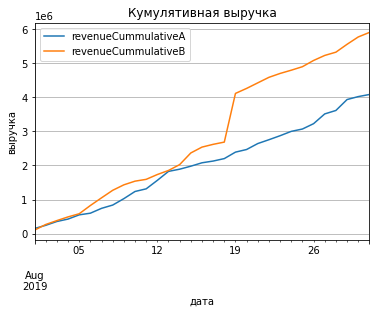

In [18]:
data[['date','revenueCummulativeA', 'revenueCummulativeB']] .plot(x = 'date',
                  grid=True,  title = "Кумулятивная выручка").set(
                  xlabel = 'дата', ylabel = 'выручка');

**Вывод** 

На графике кумулятивной выручки заметно, что кривая выручки группы B стабильно выше, чем аналогичный показатель группы А. Кроме того, где-то в период 18-19 августа произошел ее резкий скачок, результатом которого разрыв между группами стал еще более значительным, далее обе линии идут параллельно. 

Вероятнее всего такое резкое изменение произошло из-за крупного заказа.

### График кумулятивного среднего чека по группам.

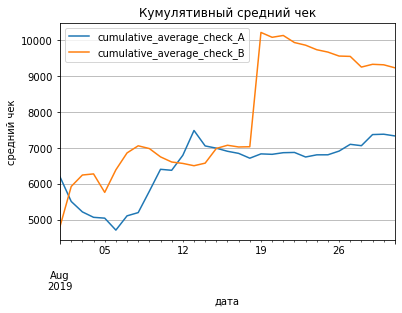

In [19]:
data['cumulative_average_check_A'] = data.revenueCummulativeA / data.ordersCummulativeA
data['cumulative_average_check_B'] = data.revenueCummulativeB / data.ordersCummulativeB

data[['date','cumulative_average_check_A', 'cumulative_average_check_B']] .plot(x = 'date',
                  grid=True,  title = "Кумулятивный средний чек").set(
                  xlabel = 'дата', ylabel = 'средний чек');

**Вывод**

Ситуация с кумулятивным средним чеком между группами не так однозначна: мы видим, что кривая группы В в период с 11 по 15 августа падает ниже уровня группы А, но затем резко растет, что еще раз подтверждает, что в группе В в период 18-19 августа была крупная покупка, которая увеличила размер кумулятивного среднего чека.

### График относительного изменения кумулятивного среднего чека группы B к группе A. 

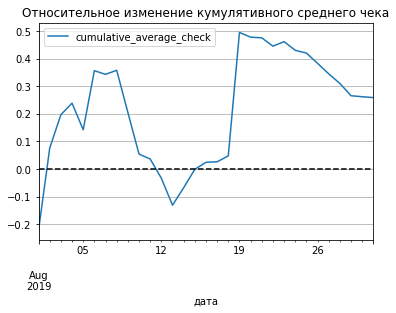

In [20]:
data['cumulative_average_check'] = data.cumulative_average_check_B / data.cumulative_average_check_A - 1


data[['date','cumulative_average_check']] .plot(x = 'date',
                  grid=True,  
                  title = "Относительное изменение кумулятивного среднего чека").set(
                  xlabel = 'дата');
plt.axhline(y=0, color='black', linestyle='--');


**Вывод**

График различия среднего чека говорит о том, что результаты группы B нестабильны: мы наблюдаем относительный рост суммы кумулятивного чека группы В примерно до 8 августа, его резкий спад до 13 августа включительно, такой же резкий подъем до 20 августа, и снова относительное падение, но не ниже нулевого уровня. 

То есть кумулятивная выручка группы В все-таки выше, чем у группы А, но она нестабильна. Возможно дело в выбросах с обоих сторон.


### График кумулятивной конверсии по группам. Сделайте выводы и предположения.



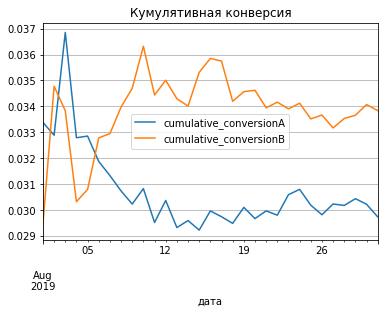

In [21]:
data['cumulative_conversionA'] = data.ordersCummulativeA / data.visitorsCummulativeA
data['cumulative_conversionB'] = data.ordersCummulativeB / data.visitorsCummulativeB

data[['date','cumulative_conversionA', 'cumulative_conversionB']] .plot(x = 'date',
                  grid=True,  
                  title = "Кумулятивная конверсия").set(
                  xlabel = 'дата');

**Вывод** 

Кумулятивная конверсия группы В стабильно выше, чем у группы А, с легкой тенденцией к снижению.

### График относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.

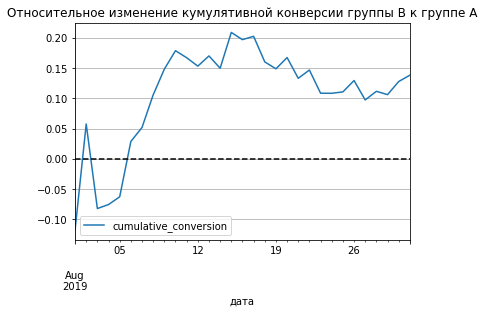

In [22]:
data['cumulative_conversion'] = data.cumulative_conversionB / data.cumulative_conversionA - 1


data[['date','cumulative_conversion']] .plot(x = 'date',
                  grid=True,  
                  title = "Относительное изменение кумулятивной конверсии группы B к группе A").set(
                  xlabel = 'дата');
plt.axhline(y=0, color='black', linestyle='--');


**Вывод**

График различия конверсии между группами сообщает, что результаты группы B стабильно лучше группы A и есть некоторая общая тенденция к его ухудшению


### Точечный график количества заказов по пользователям.

In [23]:
#Данные по группе А
ordersByUsersA = orders.query('group == "A"').groupby('visitor_id',as_index=False).transaction_id.count()
ordersByUsersA.columns = ['visitor_id', 'order_count']

print(f'Минимальное количество заказов в группе А: {ordersByUsersA.order_count.min()}')
print(f'Маскимальное количество заказов в группе А: {ordersByUsersA.order_count.max()}')
print(f'Количество платящих пользователей в группе А: {ordersByUsersA.shape[0]}')
print(f'Кoличество заказов пользователей в группе А: {ordersByUsersA.order_count.sum()}')
display(ordersByUsersA.head())


Минимальное количество заказов в группе А: 1
Маскимальное количество заказов в группе А: 7
Количество платящих пользователей в группе А: 503
Кoличество заказов пользователей в группе А: 557


,visitor_id,order_count
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


In [24]:
#Данные по группе B
ordersByUsersB = orders.query('group == "B"').groupby('visitor_id',as_index=False).transaction_id.count()
ordersByUsersB.columns = ['visitor_id', 'order_count']
print(f'Минимальное количество заказов в группе B: {ordersByUsersB.order_count.min()}')
print(f'Маскимальное количество заказов в группе B: {ordersByUsersB.order_count.max()}')
print(f'Количество платящих пользователей в группе В: {ordersByUsersB.shape[0]}')
print(f'Кoличество заказов пользователей в группе В: {ordersByUsersB.order_count.sum()}')
display(ordersByUsersB.head())

Минимальное количество заказов в группе B: 1
Маскимальное количество заказов в группе B: 6
Количество платящих пользователей в группе В: 586
Кoличество заказов пользователей в группе В: 640


,visitor_id,order_count
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1


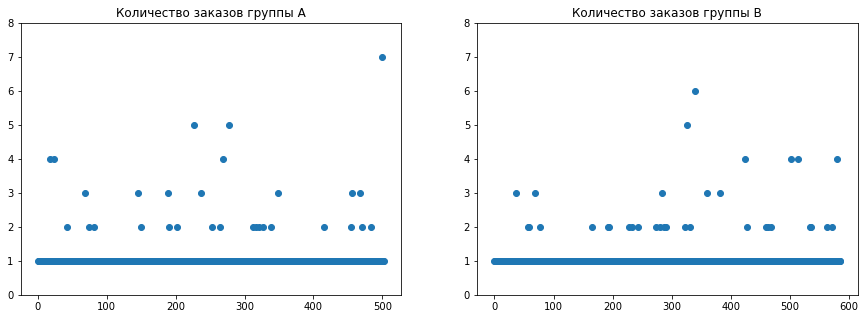

In [25]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
x_values = pd.Series(range(0,ordersByUsersA.shape[0]))
plt.scatter(x_values, ordersByUsersA.order_count) 
plt.title("Количество заказов группы А")
plt.ylim(0,8)

plt.subplot(1, 2, 2)
x_values = pd.Series(range(0,ordersByUsersB.shape[0]))
plt.scatter(x_values, ordersByUsersB.order_count) 
plt.title("Количество заказов группы В")
plt.ylim(0,8)

plt.show()

**Вывод**

На диаграмме рассеяния видно, что в обоих группах подавляющее большинство пользователей сделали по одному заказу, некоторые -по два, и очень редко- по 3-7. 

### Расчет 95-й и 99-й перцентили количества заказов на пользователя. Определение границы для  аномальных пользователей.

In [26]:
print(np.percentile(ordersByUsersA.order_count, [95, 99]))

[2.   3.98]


В группе А не более 5% клиентов, которые оформили более 2 заказов, и не более 1% оформивших более 3 заказов

In [27]:
print(np.percentile(ordersByUsersB.order_count, [95, 99]))

[2.   3.15]


В группе В не более 5% клиентов, которые оформили более 2 заказов, и не более 1% оформивших более 3 заказов

**Вывод** 

95-й и 99-й перцентили количества заказов на одного пользователя соответственно:

- для группы А: 2 и 3.98 заказа на пользователя
- для группы В: 2 и 3.15 заказа на пользователя

Примем за аномальных пользователей в обоих группах тех, кто совершил от 3 заказов и более.
Так мы уберём 1-3% пользователей с наибольшим числом заказов.

### Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

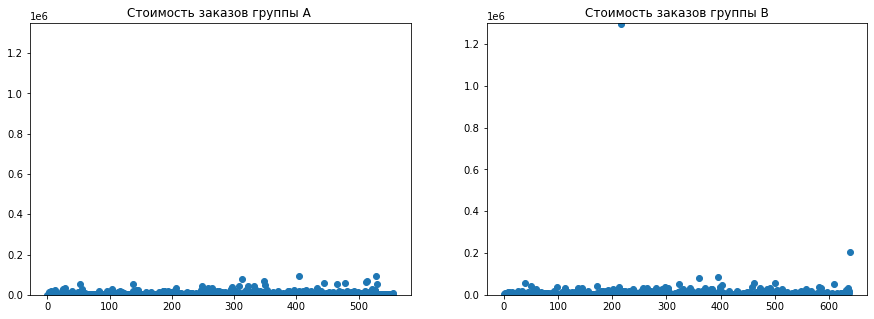

In [28]:
revenue_per_ordersA = orders.query('group == "A"').revenue
revenue_per_ordersB = orders.query('group == "B"').revenue

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
x_values = pd.Series(range(0, revenue_per_ordersA.shape[0]))
plt.scatter(x_values, revenue_per_ordersA ) 
plt.title("Стоимость заказов группы А ")
plt.ylim(0,1350000)

plt.subplot(1, 2, 2)
x_values = pd.Series(range(0, revenue_per_ordersB.shape[0]))
plt.scatter(x_values, revenue_per_ordersB ) 
plt.title("Стоимость заказов группы В")
plt.ylim(0,1300000)

plt.show()

Рассмотрим поближе часть графиков со значением стоимости заказов до 100 тыс.:

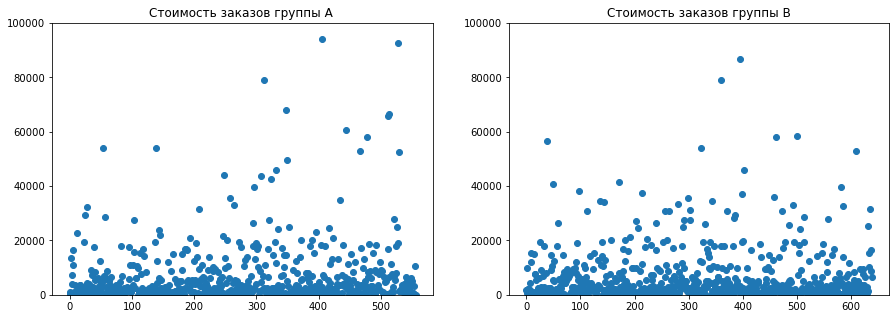

In [29]:
plt.figure(figsize=(15,5))


plt.subplot(1, 2, 1)
x_values = pd.Series(range(0, revenue_per_ordersA.shape[0]))
plt.scatter(x_values, revenue_per_ordersA ) 
plt.title("Стоимость заказов группы А ")
plt.ylim(0,100000)
plt.subplot(1, 2, 2)

x_values = pd.Series(range(0, revenue_per_ordersB.shape[0]))
plt.scatter(x_values, revenue_per_ordersB ) 
plt.title("Стоимость заказов группы В")
plt.ylim(0,100000)
plt.show()

`**Вывод**

У подавляющего большинства пользователей обоих групп сумма заказа не превышает 10 тыс. рублей, порог заказов не превышает 100 тыс руб. Тем не менее на графике группы В можно заметить один аномально большой заказ, превышающий 1,2 млн.руб. Судя по всему это и есть причина резкого скачка кумулятивного среднего чека 19 августа. В остальном группы очень похожи между собой.

### Расчет 95-й и 99-й перцентили стоимости заказов. Определение границы для аномальных заказов.

In [30]:
print(np.percentile(revenue_per_ordersA, [95, 99]))

[26718.  62764.4]


В группе А не более 5% заказов на сумму свыше  26718 руб и не более 1% -на сумму свыше 62764 руб.

In [31]:
print(np.percentile(revenue_per_ordersB, [95, 99])) 

[28787.45 55579.06]


В группе В не более 5% заказов на сумму свыше 28787 руб и не более 1% -на сумму свыше 55579 руб.

**Вывод**

Найденные нами 95-й и 99-й перцентили средних чеков равны:

- для группы А: 26718 и 62764.4 рублей
- для группы В: 28787.45 и 55579.06 рублей

Примем за аномальных пользователей в группе А тех, кто совершил заказ дороже 27000 рублей, а для группы В- тех, кто совершил заказ дороже 29 000 рублей. Так мы уберем от 1% до 5% пользователей с дорогими заказами.

### Расчет статистической значимости различий в конверсии между группами по «сырым» данным.


Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

Переменная sampleA будет состоять из двух частей:
- Список с количеством заказов для каждого из пользователей: ordersByUsersA['orders'].

- Нули для пользователей, которые ничего не заказывали. Их количество равно разнице между суммой посетителей и количеством записей о заказах: data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders']). Для этого создадим объект pd.Series нужной длины.

In [32]:
sampleA = pd.concat([
                     ordersByUsersA.order_count,
                     pd.Series(0, index=np.arange(data.visitorsPerDateA.sum() - ordersByUsersA.order_count.shape[0]),
                     name='order_count')
                     ], axis=0)

sampleB = pd.concat([
                     ordersByUsersB.order_count,
                     pd.Series(0, index=np.arange(data.visitorsPerDateB.sum() - ordersByUsersB.order_count.shape[0]),
                     name='order_count')
                    ], axis=0)

Сформулируем гипотезы:
- Н0  :статистически значимых различий в конверсии между группами нет
- Н1 : статистически значимые различия в конверсии между группами есть

Для тестирования воспользуемся критерием Манна-Уитни,  уровнем статистической значимости примем значение 0,05

In [33]:
#Расчет p-value критерия Манна-Уитни
print("{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB, True, 'two-sided')[1]))

#Расчет относительного изменения конверсии клиента группы В относительно группы А
print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.017
0.138


Таким образом, по "сырым" данным значение p-value = 0.017, что меньше уровня статистической значимости, следовательно гипотезу о том, что различий в конверсии между группами нет, отвергаем. Относительная разница в конверсии между группами составила 13,8%- на столько конверсия группы В больше конверсии группы А

**Вывод**

Гипотеза, что различий в конверсии между группами в "сырых" данных нет, отвергнута. Относительная разница конверсии группы В на 13.8% больше, чем в группе А.

### Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным.


Чтобы рассчитать статистическую значимость различий в среднем чеке между сегментами, передадим критерию mannwhitneyu() данные о выручке с заказов, а также найдём относительные различия в среднем чеке между группами.

Сформулируем гипотезы:

- Н0 :статистически значимых различий в среднем чеке заказа между группами нет
- Н1 : статистически значимые различия в среднем чеке заказа между группами есть

Для тестирования воспользуемся тестом Манна-Уитни, уровнем статистической значимости примем значение 0,05

In [34]:
#Тест Манна-Уитни
print('{0:.3f}'.format(st.mannwhitneyu(orders.query('group == "A"').revenue, orders.query('group == "B"').revenue, True, 'two-sided')[1]))

#Относительные различия суммы среднего чека
print('{0:.3f}'.format(orders.query('group == "B"').revenue.mean() / orders.query('group == "A"').revenue.mean() - 1)) 


0.729
0.259


По "сырым" данным значение p-value = 0.729, что значительно больше уровня статистической значимости, следовательно гипотезу о том, что различий в сумме среднего чека между группами нет, не отвергаем. Относительная разница суммы среднего чека между группами составила 25.8%- на столько сумма среднего чека группы В больше суммы среднего чека группы А

**Вывод**

Гипотеза о том, что в "сырых" данных суммы среднего чека в обоих группах равны, с большой степенью вероятности не отвергнута. Но относительная разница суммы среднего чека между группами составила 25.8%- на столько сумма среднего чека группы В больше суммы среднего чека группы А. Возможно причина такого различия- в выбросах.


### Расчет статистической значимости различий в конверсии между группами по «очищенным» данным. 

Найденные нами 95-й и 99-й перцентили средних чеков равны:
- для группы А  26718 и 62764.4 рублей
- для группы В- 28787.45 55579.06 рублей

95-й и 99-й перцентили количества заказов на одного пользователя соответственно:
- для группы А-  2 и 3.98 заказа на пользователя
- для группы В -2 и 3.15 заказа на пользователя

Ранее мы определили за аномальных пользователей в группе А тех, кто совершил от 3 заказов или совершил заказ дороже 27000 рублей, а для группы В- тех, кто совершил от 3 заказов или совершил заказ дороже 29 000 рублей. 

Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 27 000 для группы А и 29 000 для группы В — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers. Датасеты изначально поделим на группы.


In [35]:
#Данные по группе А

usersWithManyOrdersA = ordersByUsersA.query('order_count > 2').visitor_id
  
usersWithExpensiveOrdersA = orders.query('revenue > 27000').visitor_id
abnormalUsersA = (
    pd.concat([usersWithManyOrdersA, usersWithExpensiveOrdersA], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsersA.head(5))
print('количество аномальных пользователей группы A:',abnormalUsersA.shape[0]) 

568     113298937
1099    148427295
18      199603092
928     204675465
23      237748145
Name: visitor_id, dtype: int64
количество аномальных пользователей группы A: 73


In [36]:
#Данные по группе В

usersWithManyOrdersB = ordersByUsersB.query('order_count > 2').visitor_id
  
usersWithExpensiveOrdersB = orders.query('revenue > 29000').visitor_id
abnormalUsersB = (
    pd.concat([usersWithManyOrdersB, usersWithExpensiveOrdersB], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsersB.head(5))
print('количество аномальных пользователей группы В:',abnormalUsersB.shape[0]) 

1099    148427295
928     204675465
37      249864742
684     358944393
648     382846391
Name: visitor_id, dtype: int64
количество аномальных пользователей группы В: 61


Узнаем, как действия аномальных пользователей повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:


In [37]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA.visitor_id.isin(abnormalUsersA))
        ].order_count,
        pd.Series(
            0,
            index=np.arange(
                data.visitorsPerDateA.sum() - ordersByUsersA.order_count.shape[0]
            ),
            name='order_count',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB.visitor_id.isin(abnormalUsersB))
        ].order_count,
        pd.Series(
            0,
            index=np.arange(
                data.visitorsPerDateB.sum() - ordersByUsersB.order_count.shape[0]
            ),
            name='order_count',
        ),
    ],
    axis=0,
) 

Применим статистический критерий Манна-Уитни к полученным выборкам с "очищенными" от выбросов данными. 

Гипотезы:

- Н0 :статистически значимых различий в среднем чеке заказа между группами нет
- Н1 : статистически значимые различия в среднем чеке заказа между группами есть

уровнем статистической значимости примем значение 0,05:

In [38]:
#Тест Манна-Уитни
print('{0:.3f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered, True, 'two-sided')[1]))
#Относительные различия суммы среднего чека
print('{0:.3f}'.format(sampleBFiltered.mean() / sampleAFiltered.mean() - 1)) 

0.009
0.185


**Вывод**

По "очищенным" данным значение p-value = 0.009 (против 0,017 по "сырым" данным), что меньше уровня статистической значимости, следовательно гипотезу о том, что различий в конверсии между группами нет, отвергаем. Относительная разница в конверсии между группами составила 18.5%- на столько конверсия группы В больше конверсии группы А (против 13.8% по "сырым" данным)


### Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным. 

Результаты по конверсии практически не изменились. Проверим как изменились результаты по среднему чеку.

Гипотезы:
- Н0 :статистически значимых различий в среднем чеке заказа между группами нет
- Н1 : статистически значимые различия в среднем чеке заказа между группами есть

Уровнем статистической значимости примем значение 0,05

In [39]:
print(
    '{0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders.group == 'A',
                    np.logical_not(orders.visitor_id.isin(abnormalUsersA)),
                )
            ].revenue,
            orders[
                np.logical_and(
                    orders.group == 'B',
                    np.logical_not(orders.visitor_id.isin(abnormalUsersB))
                )
            ].revenue, True, 'two-sided',
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders.group == 'B',
                np.logical_not(orders.visitor_id.isin(abnormalUsersB)),
            )
        ].revenue.mean()
        / orders[
            np.logical_and(
                orders.group == 'A',
                np.logical_not(orders.visitor_id.isin(abnormalUsersA)),
            )
        ].revenue.mean()
        - 1
    )
) 

0.996
0.021


**Вывод**

По "oчищенным" данным значение p-value = 0.996 (против 0.729 по "сырым" данным), что значительно больше уровня статистической значимости, следовательно гипотезу о том, что различий в сумме среднего чека между группами нет, не отвергаем. 

Относительная разница суммы среднего чека между группами составила 2.1% (против 25.8% по "сырым" данным)- теперь такого значительного отличия суммы среднего чека группы В , как раньше, нет. 

## 5. Итоговые выводы. <a id="step5"></a>   

Из представленных 9 гипотез с применением фреймворка RICE нами была выбрана как наиболее приоритетная гипотеза 8 - 'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'

По результатам А/В-тестирования гипотезы были сделаны следующие выводы:

- кумулятивная выручка группы В стабильно выше выручки группы А, кроме того, мы видим ее значительный скачек 19.08.2019.

- ситуация с кумулятивным средним чеком между группами не так однозначна: кривая группы В нестабильна, но все-таки выше аналогичной группы А.
 
- кумулятивная конверсия группы В стабильно выше, чем у группы А, с легкой тенденцией к снижению.
 
В обоих группах подавляющее большинство пользователей сделали по одному заказу, некоторые -по два, и очень редко- по 3-7. У подавляющего большинства пользователей обоих групп сумма заказа не превышает 10 тыс. рублей,а порог заказов не превышает 100 тыс руб. Тем не менее на графике группы В можно заметить один аномально большой заказ на сумму 1294500 руб. Это и есть причина резкого скачка кумулятивного среднего чека группы В. В остальном группы очень похожи между собой.

Был произведен расчет статистической значимости различий в конверсии и в сумме среднего чека между группами по «сырым» и "очищенным" от выбросов данным:

- При проведении тестов с использованием критерия Манна-Уитни мы видим, что гипотеза о равенстве конверсии между группами отвергнута, а относительная разница конверсии группы В на 13.8% больше, чем в группе А. При тестировании "очищенных" от выбросов данных результат также подтвердился: конверсия отличается, а относительная разница составила 18.5%- на столько конверсия группы В больше конверсии группы А.

- Гипотеза о том, что различий в сумме среднего чека между группами нет, не отвергнута с очень большой долей вероятности, а относительная разница суммы среднего чека между группами составила 2.1% (против 25.8% по "сырым" данным)- после удаления выбросов (мы помним, что в группе В единственный очень крупный выброс- это один заказ на сумму 1.29 млн.) разница  между чеками обоих групп стремится к нулю.

**Выводы:**

Если целью тестирования было установить -изменилась ли сумма среднего чека, то она осталась прежней, мы видим лишь незначительные изменения.  Если же целью являлось изменение конверсии и связанное с ней получение дополнительной прибыли в перспективе -то результаты тестирования группы В говорят о том, что ее конверсия отличается от группы А на 13-19%.

**Рекомендации:**

Тест остановить, зафиксировать отсутствие различий между группами по сумме среднего чека и  победу группы В в части повышенной конверсии.
